In [64]:
import sys, os, glob, shutil
path= '/DATA/narendra_2021cs21/Agrofed/lemon-dataset/images'
target=path+'/'
cat_path="/DATA/narendra_2021cs21/Agrofed/lemon-dataset/cat_0037"
for p in os.listdir(path):
    target_path=target+p
    ct=p.split('_')[0]
    if ct == '0037':
        shutil.move(target_path,cat_path)

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
cat_path="/DATA/narendra_2021cs21/Agrofed/lemon-dataset/cat_0037"
target=cat_path+'/'
for p in os.listdir(cat_path):
    target_path=target+p
    print(target_path)
    img = cv2.imread('target_path', cv2.IMREAD_GRAYSCALE)
    ls=np.array(img)
    print(ls.shape)
    ls1=ls.flatten()
    


/DATA/narendra_2021cs21/Agrofed/lemon-dataset/cat_0037/0037_E_V_75_A.jpg
/DATA/narendra_2021cs21/Agrofed/lemon-dataset/cat_0037/0037_E_V_90_A.jpg
/DATA/narendra_2021cs21/Agrofed/lemon-dataset/cat_0037/0037_G_I_0_A.jpg
/DATA/narendra_2021cs21/Agrofed/lemon-dataset/cat_0037/0037_G_I_120_A.jpg
/DATA/narendra_2021cs21/Agrofed/lemon-dataset/cat_0037/0037_G_I_105_A.jpg


In [6]:
len(ls1[np.nonzero(ls1)])

116554

In [5]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch


In [6]:
def get_data():
    data_dir = '/home/harsh_1921cs01/hub/os/nl/VJH_020/Agrofed/lemon-dataset/image'
   
    transform = transforms.Compose([
        #transforms.RandomRotation(20),
        transforms.RandomResizedCrop(128),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor()])

    train_set = datasets.ImageFolder(data_dir +'/train_image', transform=transform)
    test_set = datasets.ImageFolder(data_dir + '/test_image', transform=transform)

    train = DataLoader(train_set, batch_size=32, shuffle=True)
    test = DataLoader(test_set, batch_size=32, shuffle=True)

    return train, test

In [7]:
def train_imshow():
    classes = ('cat_0001', 'cat_0002') # Defining the classes we have
    dataiter = iter(train)
    images, labels = dataiter.next()
    fig, axes = plt.subplots(figsize=(10, 4), ncols=5)
    for i in range(5):
        ax = axes[i]
        ax.imshow(images[i].permute(1, 2, 0)) 
        ax.title.set_text(' '.join('%5s' % classes[labels[i]]))
    plt.show()

In [8]:
train, test = get_data()



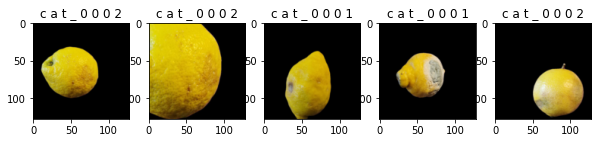

In [9]:
train_imshow()

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(8, 8)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

if torch.cuda.is_available():
    model = net.cuda()
    criterion = criterion.cuda()



In [ ]:
def train_net(n_epoch): # Training our network
    losses = []
    for epoch in range(n_epoch):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(train, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
           
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            losses.append(loss)
            running_loss += loss.item()
            if i % 100 == 99:  # print every 2000 mini-batches
                print('[%d, %5d] loss: %.10f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    plt.plot(losses, label='Training loss')
    plt.show()
    print('Finished Training')

In [ ]:
train_net(10)

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the %d test images: %d %%' % (len(test),
    100 * correct / total))

In [4]:
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder


#train and test data directory
data_dir = "/home/harsh_1921cs01/hub/os/nl/VJH_020/Agrofed/lemon-dataset/image/train_image_10"
test_data_dir = "/home/harsh_1921cs01/hub/os/nl/VJH_020/Agrofed/lemon-dataset/image/test_image_10"


#load the train and test data
dataset = ImageFolder(data_dir,transform = transforms.Compose([
    transforms.Resize((1050,1050)),transforms.ToTensor()
]))
test_dataset = ImageFolder(test_data_dir,transforms.Compose([
    transforms.Resize((1050,1050)),transforms.ToTensor()
]))

In [3]:
img, label = dataset[950]
print(img.shape,label)

torch.Size([3, 512, 512]) 9


In [21]:
print("Follwing classes are there : \n",dataset.classes)

Follwing classes are there : 
 ['cat_0001', 'cat_0002', 'cat_0003', 'cat_0004', 'cat_0005', 'cat_0006', 'cat_0007', 'cat_0008', 'cat_0009', 'cat_0010']


Label : cat_0001


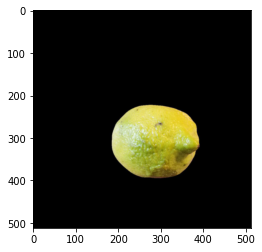

In [22]:
def display_img(img,label):
    print(f"Label : {dataset.classes[label]}")
    plt.imshow(img.permute(1,2,0))

#display the first image in the dataset
display_img(*dataset[0])

In [23]:
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

batch_size = 32
val_size = 100
train_size = len(dataset) - val_size 

train_data,val_data = random_split(dataset,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

#output
#Length of Train Data : 12034
#Length of Validation Data : 2000

#load the train and validation into batches.
train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_data, batch_size*2, num_workers = 4, pin_memory = True)


Length of Train Data : 875
Length of Validation Data : 100


In [24]:
train_dl

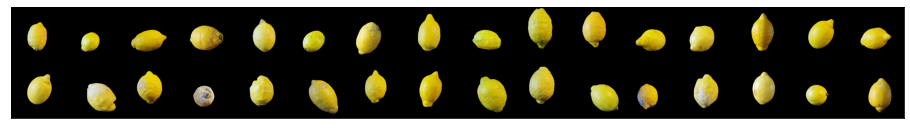

In [25]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(train_dl)

In [26]:
import torch.nn as nn
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [30]:
class NaturalSceneClassification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 256, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(256,64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
        
            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(128 ,128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(256,256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Flatten(),
            nn.Linear(1048576,1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512,10)
        )
    
    def forward(self, xb):
        return self.network(xb)
    
model = NaturalSceneClassification()

In [31]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

  
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

  
def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    
    history = []
    optimizer = opt_func(model.parameters(),lr)
    for epoch in range(epochs):
        
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    
    return history

In [ ]:
num_epochs = 30
opt_func = torch.optim.Adam
lr = 0.001
#fitting the model on training data and record the result after each epoch
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)